In [1]:
from layers.linear_layer import LinearLayer
from layers.sparse_layer import SparseLayer
from nets.fcnn import *
from utilis.activations import *
import matplotlib.pyplot as plt
import utilis.mnist.mnist_helper as mh

   
img_size = 28
num_hidden = 100
k = 70
learning_rate = 0.01
epochs = 10000
batch_size = 256
print_epochs = 1000
num_test_examples = 10

helper = mh.mnist_helper()
train_lbl, train_img, test_lbl, test_img = helper.get_data()

x_data = train_img.reshape(-1, img_size * img_size) / np.float32(256)
test_data = test_img.reshape(-1, img_size * img_size) / np.float32(256)

layers = [
    # LinearLayer(name="input", n_in=x_data.shape[1], n_out=num_hidden, activation=sigmoid_function),
    SparseLayer(name="hidden 1", n_in=x_data.shape[1], n_out=num_hidden,
                activation=sigmoid_function, num_k_sparse=k),
    LinearLayer(name="output", n_in=num_hidden, n_out=x_data.shape[1], activation=sigmoid_function)
]

nn = FCNeuralNet(layers=layers, cost_func=subtract_err)
nn.print_network()

nn.train(x_data, x_data, learning_rate=learning_rate, epochs=epochs,
         batch_size=batch_size, print_epochs=print_epochs)

network:
layer - hidden 1: weights: (784, 100)
layer - output: weights: (100, 784)
training start
epochs: 1000, loss: 0.0514
epochs: 2000, loss: 0.0426
epochs: 3000, loss: 0.0434
epochs: 4000, loss: 0.0402
epochs: 5000, loss: 0.0389
epochs: 6000, loss: 0.0454
epochs: 7000, loss: 0.0386
epochs: 8000, loss: 0.0366
epochs: 9000, loss: 0.0325
epochs: 10000, loss: 0.0321
training complete, elapsed time: 00:03:20


encode_samples (100, 784)
Output shape (10, 784)


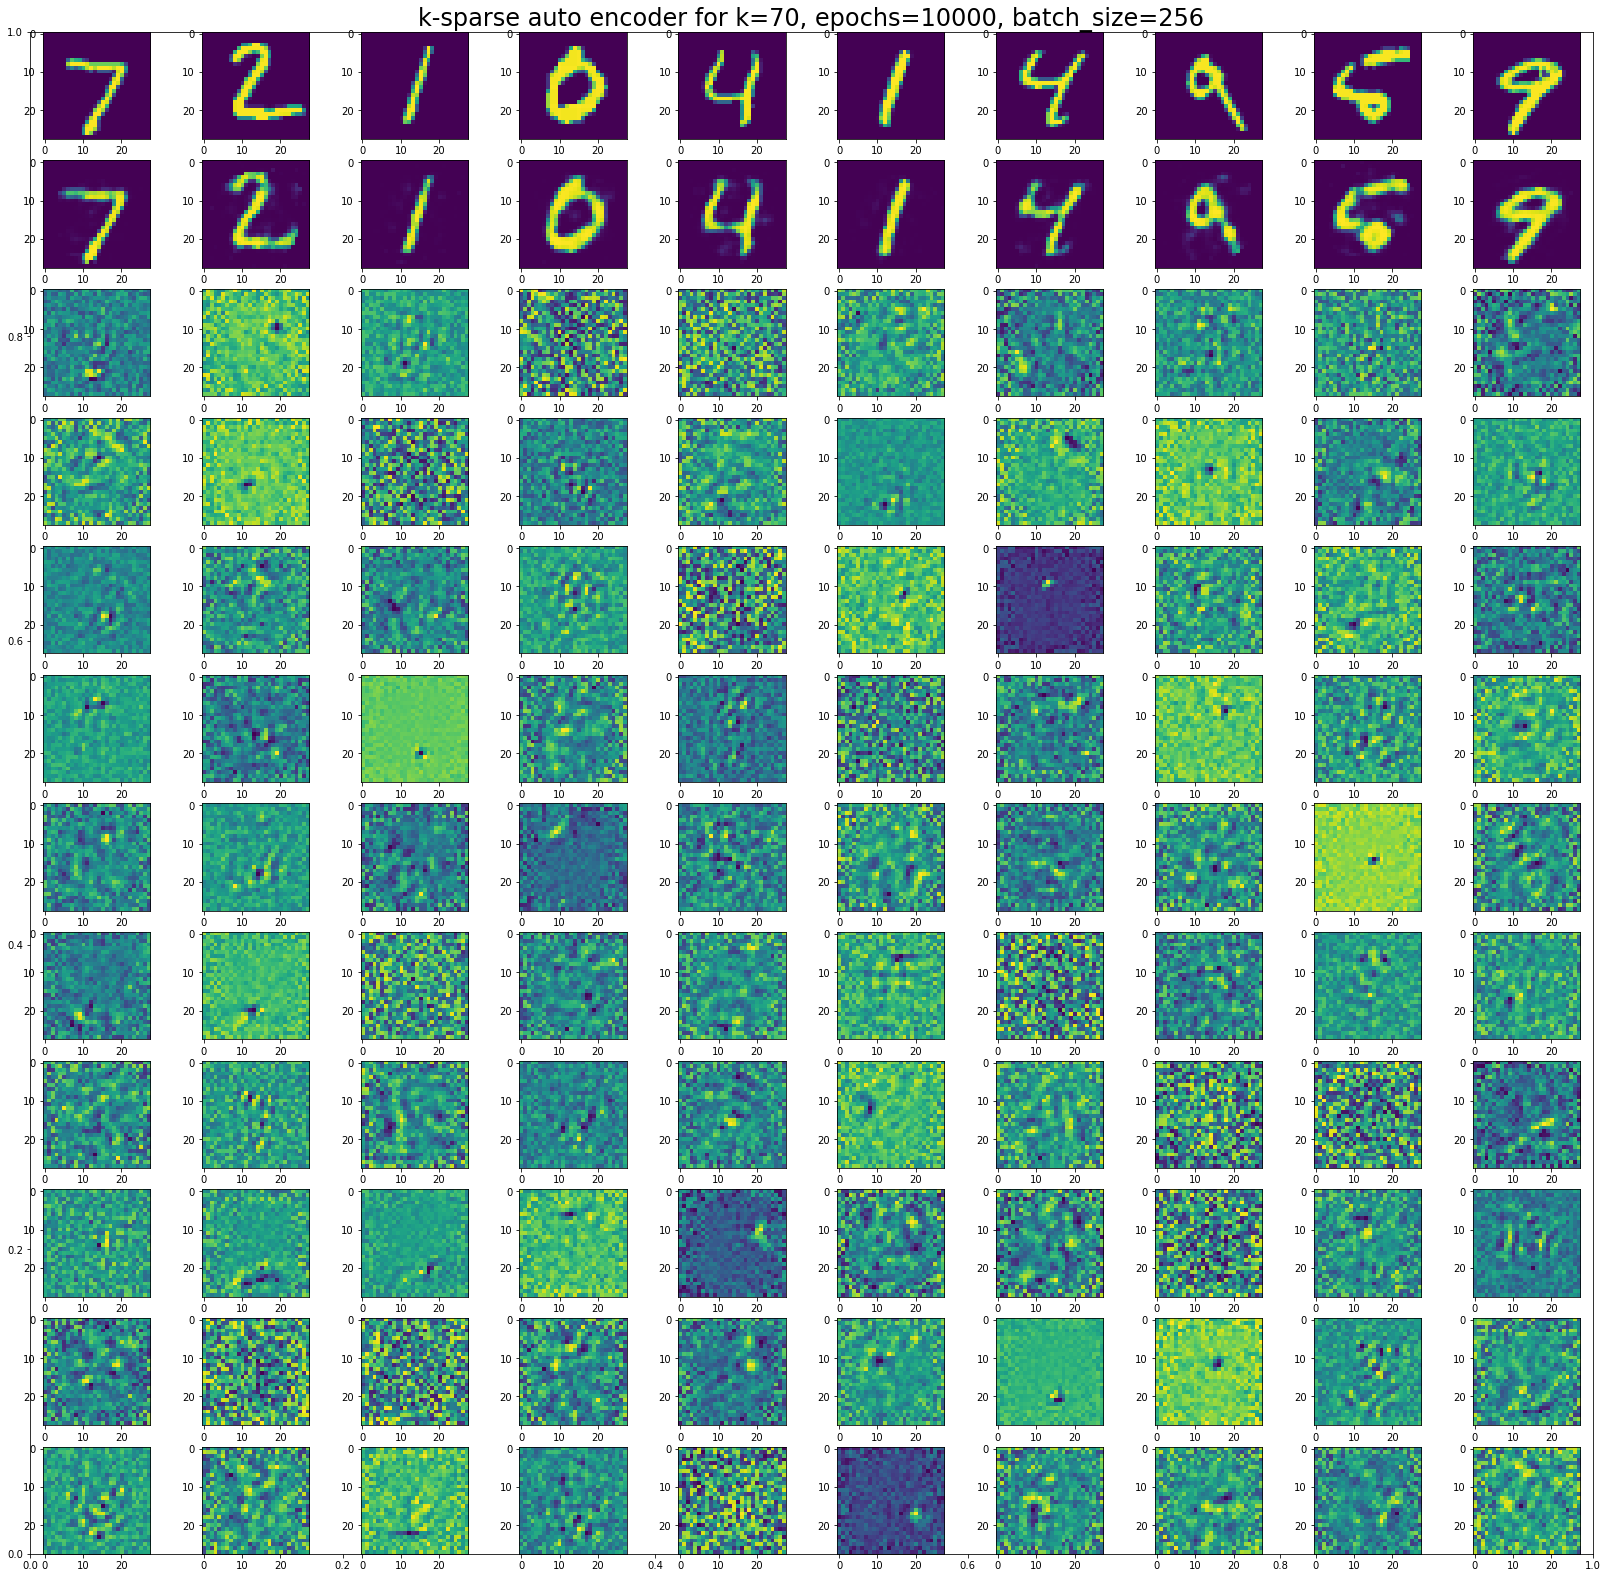

In [2]:
# Encode and decode images from test set and visualize their reconstruction.
def add_plot_images(images, cols=10, img_size=28, title=None):
    n_images = len(images)
    fig = plt.figure(figsize=(img_size, img_size))
    plt.title(title, fontsize=24)
#     plt.gray()
    rows = int(n_images / cols)
    for i in range(1, n_images + 1):
        img = images[i - 1]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)

n = num_test_examples

test_samples = test_data[0:n]
encode_samples = nn.layers[0].weights.T
output_samples = nn.predict(test_samples)

print("encode_samples", encode_samples.shape)
print("Output shape", output_samples.shape)

img_input = test_samples.reshape(-1, img_size, img_size)
img_encode = encode_samples.reshape(-1, img_size, img_size)
img_output = output_samples.reshape(-1, img_size, img_size)

title = "k-sparse auto encoder for k={0}, epochs={1}, batch_size={2}".format(k, epochs, batch_size)
all_images = np.concatenate((img_input, img_output, img_encode))

add_plot_images(all_images, cols=10, img_size=img_size, title=title)

plt.show()